<a href="https://colab.research.google.com/github/tta2yta/telecom-churn/blob/main/telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install libgfortran3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gcc-6-base
The following NEW packages will be installed:
  gcc-6-base libgfortran3
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 286 kB of archives.
After this operation, 1,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gcc-6-base amd64 6.5.0-2ubuntu1~18.04 [16.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libgfortran3 amd64 6.5.0-2ubuntu1~18.04 [270 kB]
Fetched 286 kB in 1s (442 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend re

<b> Installing Glmnet package for Linear and logestic regression with Lasso and Ridge</b>

In [ ]:
!pip install 'git+https://github.com/bbalasub1/glmnet_python.git'

  Cloning https://github.com/bbalasub1/glmnet_python.git to /tmp/pip-req-build-v8z14_y5
  Running command git clone -q https://github.com/bbalasub1/glmnet_python.git /tmp/pip-req-build-v8z14_y5
  Created wheel for glmnet-python: filename=glmnet_python-0.2.0-cp36-none-any.whl size=184391 sha256=1e6b8e566fec49e3c7142b18c6ee6388858285d5147aa48081247e77c0dd227c
  Stored in directory: /tmp/pip-ephem-wheel-cache-izvygjd9/wheels/9a/96/22/0c5a6076bcb66664ff6169c796b632d99eff6d958e4b953fe5
Successfully built glmnet-python


<b>Importing Neccessary libraries</b>

In [ ]:
%reset -f
%matplotlib inline

import sys
sys.path.append('../test')
sys.path.append('../lib')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glmnet_python
from glmnet import glmnet
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

<b> Uploading the csv file dataset to colab </b>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving telecom-data.csv to telecom-data (1).csv


<b>Loading the csv file to dataframe for processing and analaysing data</b>

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['telecom-data.csv']))

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2> Data Cleaning </h2>

<b> Let's determine for nay nulls in our dataset.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b>Let's check the datatype of all features in our dataset. As you can see below the "Totalcharges" column is Object type but it should be a continous value(int or float)</b>

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<b> The code below is to find any empty value in all features of our dataset. If any empty value exist, the row will be removed.</b>

In [ ]:
for i in range (0, len(df.columns)):
  print(df.columns[i])
  print(df[df.iloc[:,i] == ' '].index) 

customerID
Int64Index([], dtype='int64')
gender
Int64Index([], dtype='int64')
SeniorCitizen
Int64Index([], dtype='int64')
Partner
Int64Index([], dtype='int64')
Dependents
Int64Index([], dtype='int64')
tenure
Int64Index([], dtype='int64')
PhoneService
Int64Index([], dtype='int64')
MultipleLines
Int64Index([], dtype='int64')
InternetService
Int64Index([], dtype='int64')
OnlineSecurity
Int64Index([], dtype='int64')
OnlineBackup
Int64Index([], dtype='int64')
DeviceProtection
Int64Index([], dtype='int64')
TechSupport
Int64Index([], dtype='int64')
StreamingTV
Int64Index([], dtype='int64')
StreamingMovies
Int64Index([], dtype='int64')
Contract
Int64Index([], dtype='int64')
PaperlessBilling
Int64Index([], dtype='int64')
PaymentMethod
Int64Index([], dtype='int64')
MonthlyCharges
Int64Index([], dtype='int64')
TotalCharges
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Churn
Int64Index([], dtype='int64')


<b> Let's remove the empty valued row from our dataset </b>

In [ ]:
totalcharges_empty=df[df['TotalCharges'] == ' '].index 
for i in range (0 , len(totalcharges_empty)):
 print(totalcharges_empty[i])
 df.drop(totalcharges_empty[i], inplace=True)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [ ]:
df[df['TotalCharges'] == ' '].index 

Int64Index([], dtype='int64')

<b> Changing the datatype of "TotalCharges" column from object to a continous value(float)</b>

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype(str).astype(float)

<b>Let's describe some statistcal information for the continous type features of our dataset </b>

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.shape

(7032, 21)

<h2> Now let's see the graph destributions of some categorical features of the cleaned dataset</h2> 

<b>Churn rate</b>

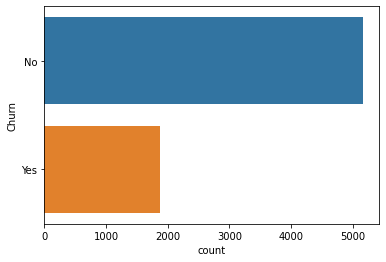

In [ ]:
sns.countplot(y ='Churn', data = df ,orient="h") 

In [ ]:
result=df.groupby('Churn')['tenure'].count().reset_index(name="count")
result

,Churn,count
0,No,5163
1,Yes,1869


In [ ]:
#Charn Rate
(1869/7032)*100

26.578498293515356

**Checking outliers**<br>
An outlier is an observation point that is distant from other observations. we will discover outlies with visualization tool and remove them with IQR score<br>

Discover outliers with visualization tools
Box plot- a box plot is a method for graphically depicting groups of numerical data through their quartiles. So, let's setermine an outliers for continous variables(MonthlySalary, tenture and TotalCharges). As we have seen below, we do not have an outlier within these variables. Any data points that show above or below the whiskers, can be considered outliers or anomalous. 


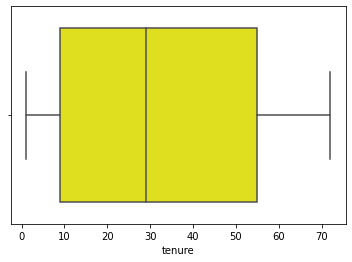

In [ ]:
sns.boxplot(x=df['tenure'],color='yellow') #boxplot is a part of graphical presentation

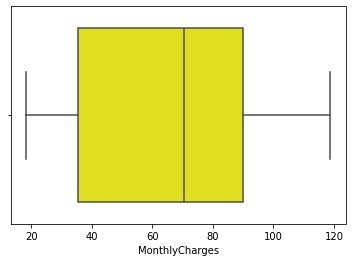

In [ ]:
sns.boxplot(x=df['MonthlyCharges'],color='yellow') #boxplot is a part of graphical presentation

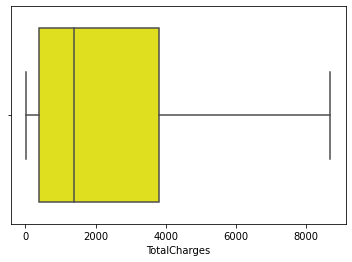

In [ ]:
sns.boxplot(x=df['TotalCharges'],color='yellow') #boxplot is a part of graphical presentation

<b>Categorical Features 
Six Additional Services</b>

•	Customers with the first 4 additional services (Security, Backup, Protection, Tech support) are less likely to churn.
•	Streaming services (Streaming TV and Streaming Movies) are average possibilities to associate with churn.


Text(0.5, 0.98, 'Online Security')

<Figure size 432x288 with 0 Axes>

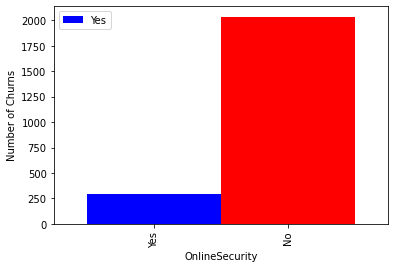

In [ ]:
val_yes=df.loc[(df['OnlineSecurity'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['OnlineSecurity'] == 'No') & (df['Churn'] == 'No')]
data = {'OnlineSecurity':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_OnlineSecurity = pd.DataFrame (data, columns = ['Churn','OnlineSecurity'], index=['Yes','No'])

import matplotlib.pyplot as plt
fig=plt.figure()
df_OnlineSecurity .plot(x="Churn", y="OnlineSecurity", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of Churns')
fig.suptitle('Online Security')

(1854, 21)


(523, 21)

<Figure size 432x288 with 0 Axes>

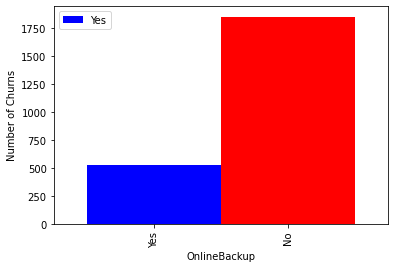

In [ ]:
val_yes=df.loc[(df['OnlineBackup'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['OnlineBackup'] == 'No') & (df['Churn'] == 'No')]
data = {'OnlineBackup':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_OnlineBackup = pd.DataFrame (data, columns = ['Churn','OnlineBackup'], index=['Yes','No'])
fig=plt.figure()
df_OnlineBackup .plot(x="Churn", y="OnlineBackup", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('OnlineBackup')
plt.ylabel('Number of Churns')
fig.suptitle('Online Backup')
print(val_no.shape)
val_yes.shape

(1883, 21)


(545, 21)

<Figure size 432x288 with 0 Axes>

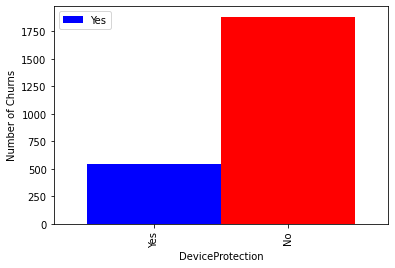

In [ ]:
val_yes=df.loc[(df['DeviceProtection'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['DeviceProtection'] == 'No') & (df['Churn'] == 'No')]
data = {'DeviceProtection':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_DeviceProtection = pd.DataFrame (data, columns = ['Churn','DeviceProtection'], index=['Yes','No'])
fig=plt.figure()
df_DeviceProtection .plot(x="Churn", y="DeviceProtection", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('DeviceProtection')
plt.ylabel('Number of Churns')
fig.suptitle('Device Protection')
print(val_no.shape)
val_yes.shape

(2026, 21)


(310, 21)

<Figure size 432x288 with 0 Axes>

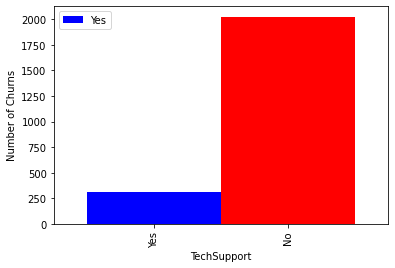

In [ ]:
val_yes=df.loc[(df['TechSupport'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['TechSupport'] == 'No') & (df['Churn'] == 'No')]
data = {'TechSupport':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_TechSupport = pd.DataFrame (data, columns = ['Churn','TechSupport'], index=['Yes','No'])
fig=plt.figure()
df_TechSupport .plot(x="Churn", y="TechSupport", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('TechSupport')
plt.ylabel('Number of Churns')
fig.suptitle('Tech Support')
print(val_no.shape)
val_yes.shape

(1867, 21)


(814, 21)

<Figure size 432x288 with 0 Axes>

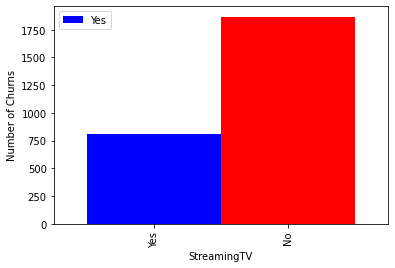

In [ ]:
val_yes=df.loc[(df['StreamingTV'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['StreamingTV'] == 'No') & (df['Churn'] == 'No')]
data = {'StreamingTV':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_StreamingTV = pd.DataFrame (data, columns = ['Churn','StreamingTV'], index=['Yes','No'])
fig=plt.figure()
df_StreamingTV .plot(x="Churn", y="StreamingTV", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('StreamingTV')
plt.ylabel('Number of Churns')
fig.suptitle('Streaming TV')
print(val_no.shape)
val_yes.shape


(1843, 21)


(818, 21)

<Figure size 432x288 with 0 Axes>

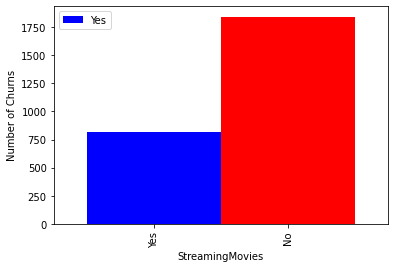

In [ ]:
val_yes=df.loc[(df['StreamingMovies'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['StreamingMovies'] == 'No') & (df['Churn'] == 'No')]
data = {'StreamingMovies':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_StreamingMovies = pd.DataFrame (data, columns = ['Churn','StreamingMovies'], index=['Yes','No'])
fig=plt.figure()
df_StreamingMovies .plot(x="Churn", y="StreamingMovies", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('StreamingMovies')
plt.ylabel('Number of Churns')
fig.suptitle('Streaming Movies')
print(val_no.shape)
val_yes.shape

<b>Numerical Features
Tenure & Monthly Charges </b>
1. New clients are more likely to churn<br>
2. Clients with high Monthly Charges are also more likely to churn<br>
3. Tenure and Monthly Charges are probably important features

Text(0.5, 1.0, 'KDE for Tenure')

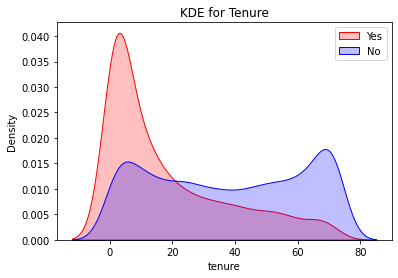

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[(df['Churn']=='Yes'), 
            'tenure'], color='r', shade=True, Label='Yes') 
sns.kdeplot(df.loc[(df['Churn']=='No'), 
            'tenure'], color='b', shade=True, Label='No') 
ax.legend(['Yes', 'No'])
ax.set_title("KDE for Tenure")

Text(0.5, 1.0, 'KDE for Monthly Charges')

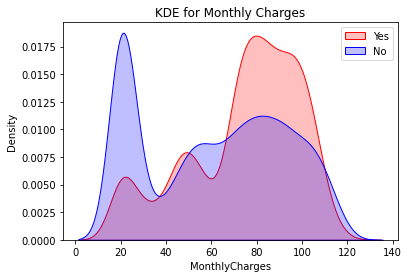

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[(df['Churn']=='Yes'), 
            'MonthlyCharges'], color='r', shade=True, Label='Yes') 
sns.kdeplot(df.loc[(df['Churn']=='No'), 
            'MonthlyCharges'], color='b', shade=True, Label='No') 
ax.legend(['Yes', 'No'])
ax.set_title("KDE for Monthly Charges")

<b>Demographic information of customers</b>

In [ ]:
result=df.groupby('gender')['tenure'].count().reset_index(name="count")
result

,gender,count
0,Female,3483
1,Male,3549


[Text(0, 0.5, 'Gender'), Text(0.5, 0, 'Percentage')]

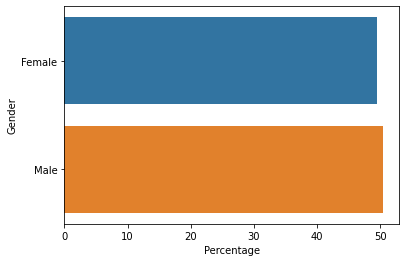

In [ ]:
size=100
ax=sns.barplot(x='tenure', y='gender', orient='h', data = df, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "Gender")

In [ ]:
senior_citz=df.groupby('SeniorCitizen')['customerID'].count().reset_index(name="count")

In [ ]:
senior_citz

,SeniorCitizen,count
0,0,5890
1,1,1142


[Text(0, 0.5, 'SeniorCitizen'), Text(0.5, 0, 'Percentage')]

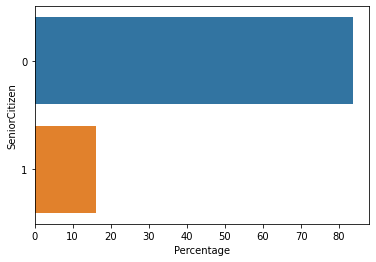

In [ ]:

ax=sns.barplot(x='SeniorCitizen', y='SeniorCitizen', orient='h', data = df, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "SeniorCitizen")

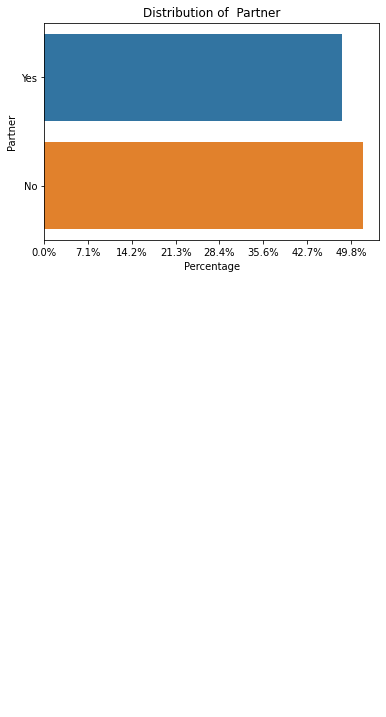

In [ ]:
total = len(df['Partner'])*1.
ax = sns.countplot(y="Partner", data=df)
plt.title('Distribution of  Partner')
plt.xlabel('Percentage')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

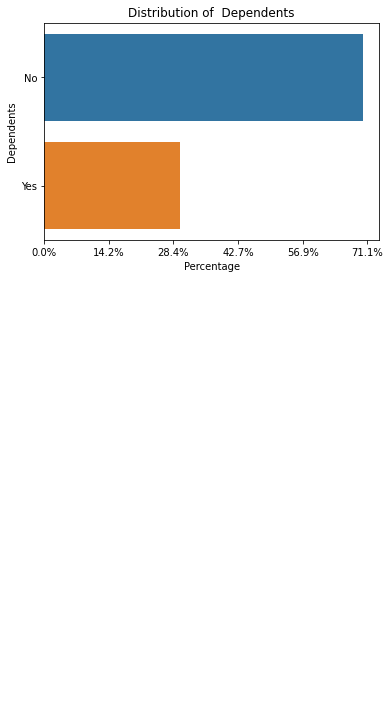

In [ ]:
total = len(df['Dependents'])*1.
ax = sns.countplot(y="Dependents", data=df)
plt.title('Distribution of  Dependents')
plt.xlabel('Percentage')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

<b align="center">Phone service for customers</b>

[Text(0, 0.5, 'PhoneService'), Text(0.5, 0, 'Percentage')]

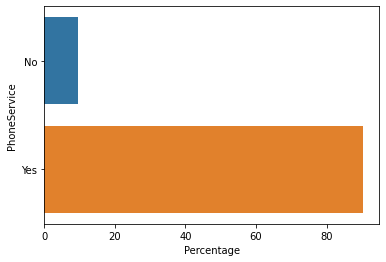

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='PhoneService', orient='h', data = df, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "PhoneService")

In [ ]:
Mult_Lines=df[df.MultipleLines != 'No phone service']

[Text(0, 0.5, 'MultipleLines'), Text(0.5, 0, 'Percentage')]

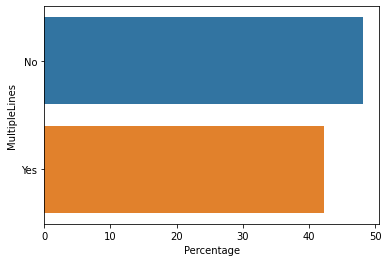

In [ ]:
ax=sns.barplot(x=Mult_Lines.index, y='MultipleLines', orient='h', data = Mult_Lines, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "MultipleLines")

<b> Internet service for customers </b>

[Text(0, 0.5, 'InternetService'), Text(0.5, 0, 'Percentage')]

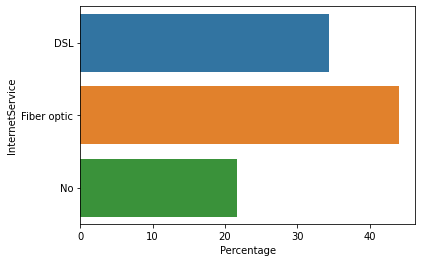

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='InternetService', orient='h', data = df, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "InternetService")

In [ ]:
Online_Sec=df[df.OnlineSecurity != 'No internet service']

[Text(0, 0.5, 'OnlineSecurity'), Text(0.5, 0, 'Percentage')]

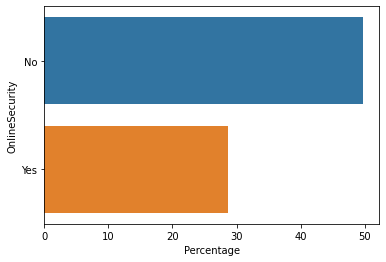

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='OnlineSecurity', orient='h', data = Online_Sec, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "OnlineSecurity")

In [ ]:
Online_Back=df[df.OnlineBackup != 'No internet service']

[Text(0, 0.5, 'OnlineBackup'), Text(0.5, 0, 'Percentage')]

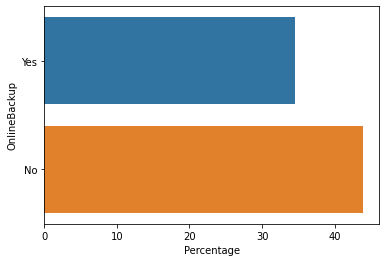

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='OnlineBackup', orient='h', data = Online_Back, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "OnlineBackup")

In [ ]:
Device_Prot=df[df.DeviceProtection != 'No internet service']

[Text(0, 0.5, 'DeviceProtection'), Text(0.5, 0, 'Percentage')]

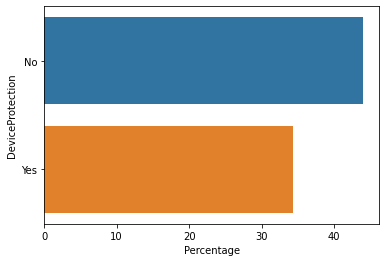

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='DeviceProtection', orient='h', data = Device_Prot, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "DeviceProtection")

In [ ]:
Tech_Sup=df[df.TechSupport != 'No internet service']

[Text(0, 0.5, 'TechSupport'), Text(0.5, 0, 'Percentage')]

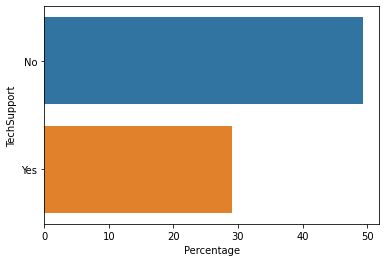

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='TechSupport', orient='h', data = Tech_Sup, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "TechSupport")

In [ ]:
Stream_Tv=df[df.StreamingTV != 'No internet service']

[Text(0, 0.5, 'StreamingTV'), Text(0.5, 0, 'Percentage')]

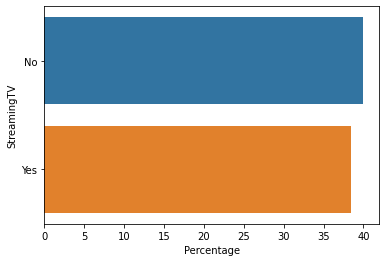

In [ ]:
ax=sns.barplot(x='SeniorCitizen', y='StreamingTV', orient='h', data = Stream_Tv, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(xlabel="Percentage", ylabel = "StreamingTV")

<b>Categorical Features</b>
Customers with the first 4 additional services (Security, Backup, Protection,
Tech support) are less likely to churn
! Streaming services are not likely to associate with churn

Text(0.5, 0.98, 'Online Security')

<Figure size 432x288 with 0 Axes>

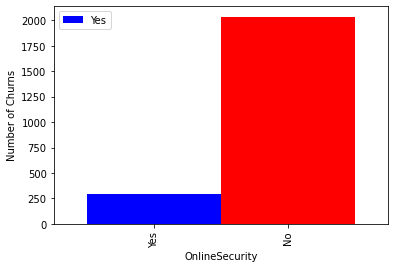

In [ ]:
val_yes=df.loc[(df['OnlineSecurity'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['OnlineSecurity'] == 'No') & (df['Churn'] == 'No')]
data = {'OnlineSecurity':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
df_OnlineSecurity = pd.DataFrame (data, columns = ['Churn','OnlineSecurity'], index=['Yes','No'])

import matplotlib.pyplot as plt
fig=plt.figure()
df_OnlineSecurity .plot(x="Churn", y="OnlineSecurity", kind="bar", color=['blue', 'red'], width=1.0, legend=False)
plt.legend(["Yes", "No"]);
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of Churns')
fig.suptitle('Online Security')

In [ ]:
val_yes=df.loc[(df['OnlineBackup'] == 'Yes') & (df['Churn'] == 'Yes')]
val_no=df.loc[(df['OnlineBackup'] == 'No') & (df['Churn'] == 'No')]
data = {'OnlineBackup':  [val_yes.shape[0], val_no.shape[0]], 'Churn':['Yes','No']}
OnlineBackup = pd.DataFrame (data, columns = ['Churn','OnlineBackup'], index=['Yes','No'])

In [ ]:
df_OnlineBackup

,Churn,OnlineBackup
Yes,Yes,NaN
No,No,NaN


In [ ]:
val_no.shape

(1854, 21)

<b> Now, Let's see the unique values of categorical features</b>

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Since computers are unable to process categorical data as these categories have no meaning for them, this information has to be prepared if we want a computer to be able to process it. For this we ll use  One-hot Encoding--- is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element. In pandas we have get_dummies for creating one-hot encoding.



In [ ]:
new_df=pd.get_dummies(df, columns=[ "MultipleLines","InternetService",
                            "OnlineSecurity","OnlineBackup","DeviceProtection", "TechSupport", "StreamingTV","StreamingMovies","PaymentMethod",
                            "Contract"])

In [ ]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.50,No,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,No,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


<b> Let's replace the "Yes" and "No" values of the features with 1 and 0 </b>

In [ ]:
for col in new_df.columns:
 if(new_df.dtypes[col] == 'object'):
  # print(col)
  # print(df.dtypes[col])
  new_df[col].replace({"Male": 1, "Female": 0}, inplace=True)

In [ ]:
for col in new_df.columns:
 if(new_df.dtypes[col] == 'object'):
  # print(col)
  # print(df.dtypes[col])
  new_df[col].replace({"Yes": 1, "No": 0}, inplace=True)

In [ ]:
new_df=new_df.iloc[:, new_df.columns != 'customerID']
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0


<b>Correlation Matrix with Pearsons correlation. Correlation states how the features are related to each other or the target variable. </b>

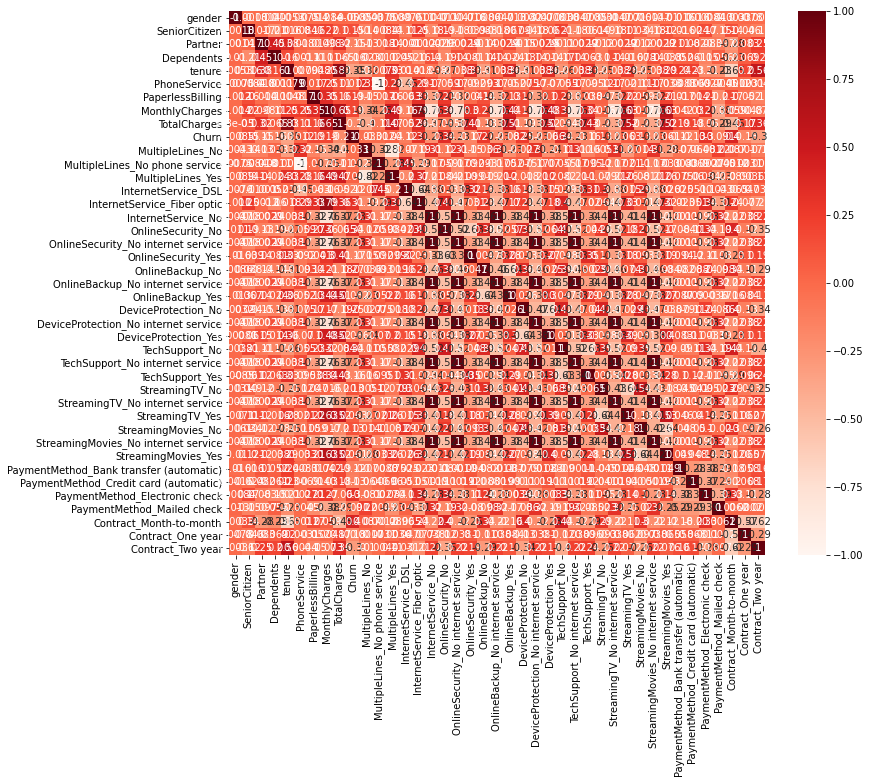

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<b>Most correlated features</b>

In [ ]:
correlated_features= set()
correlation_matrix=df.corr()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if(abs(correlation_matrix.iloc[i,j] > 0.8)):
      colname1=correlation_matrix.columns[i]
      colname2=correlation_matrix.columns[j]
      correlated_features.add(colname1)
      correlated_features.add(colname2)


In [ ]:
print(correlated_features)

{'TotalCharges', 'tenure'}


<b>Feature selection is one of the first and important steps while performing any machine learning task.When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable.
so let's determine the most interesting feature using Backward elimination.The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.</b>

In [ ]:
import statsmodels.api as sm

In [ ]:
#Backward Elimination
X = new_df.loc[:, new_df.columns != 'Churn']
y = new_df.loc[:, new_df.columns == 'Churn']
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Electronic check', 'Contract_Month-to-month', 'Contract_One year']


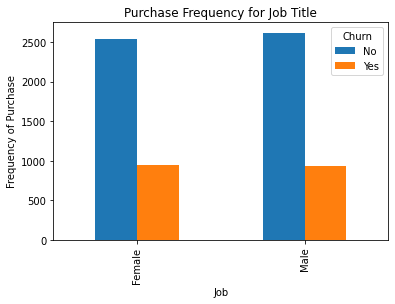

In [ ]:
%matplotlib inline
pd.crosstab(df.gender,df.Churn).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

<h3> Market Segmentaion with K-means algoritm

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
XX = new_df.loc[:, new_df.columns != 'customerID']

In [ ]:
XX.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
PaperlessBilling,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
XX_train, XX_test = train_test_split(XX, test_size=0.2, random_state=0)

<b>Let's use the elbow method inorder to determine the number of clusters.</b>

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

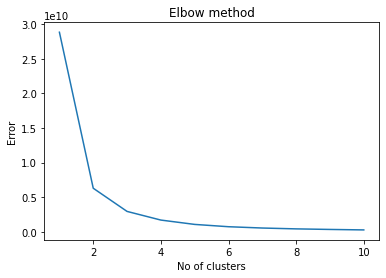

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(XX_train)
    kmeans.fit(XX_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans5 = KMeans(n_clusters=2)
y_kmeans5 = kmeans5.fit_predict(XX_train)

<b>displaying the centroid points</b>

In [ ]:
kmeans5.cluster_centers_

array([[5.06175952e-01, 1.43181245e-01, 3.95512982e-01, 2.81825057e-01,
        2.11963701e+01, 8.81018402e-01, 5.50289892e-01, 5.36124401e+01,
        9.80021944e+02, 3.15099571e-01, 5.83816486e-01, 1.18981598e-01,
        2.97201916e-01, 3.47365768e-01, 3.44592891e-01, 3.08041341e-01,
        5.14746660e-01, 3.08041341e-01, 1.77211999e-01, 4.88026216e-01,
        3.08041341e-01, 2.03932443e-01, 4.92311570e-01, 3.08041341e-01,
        1.99647088e-01, 5.16763297e-01, 3.08041341e-01, 1.75195362e-01,
        4.52230905e-01, 3.08041341e-01, 2.39727754e-01, 4.45424754e-01,
        3.08041341e-01, 2.46533905e-01, 1.73682884e-01, 1.78472397e-01,
        3.55936476e-01, 2.91908243e-01, 6.77590118e-01, 1.65616335e-01,
        1.56793547e-01],
       [4.93968637e-01, 2.02050663e-01, 6.85162847e-01, 3.44993969e-01,
        5.90898673e+01, 9.52955368e-01, 7.02050663e-01, 9.11431544e+01,
        5.37089349e+03, 1.50784077e-01, 2.33413752e-01, 4.70446321e-02,
        7.19541616e-01, 3.34137515e-01,

In [ ]:
XX_train["label"] = y_kmeans5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<b>Now lets see the three dimensional presentation of the item(with features "tenure", "Churn" and "TotalCharges") of ourdataset with two cluster</b>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

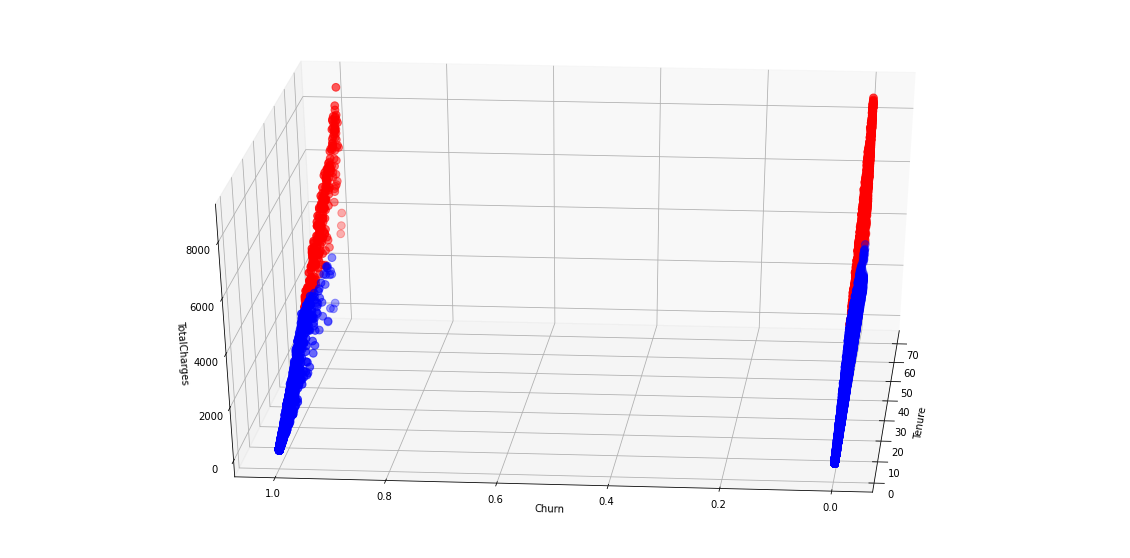

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX_train.tenure[XX_train.label == 0], XX_train["Churn"][XX_train.label == 0], XX_train["TotalCharges"][XX_train.label == 0], c='blue', s=60)
ax.scatter(XX_train.tenure[XX_train.label == 1], XX_train["Churn"][XX_train.label == 1], XX_train["TotalCharges"][XX_train.label == 1], c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Tenure")
plt.ylabel("Churn")
ax.set_zlabel('TotalCharges')
plt.show()

<b> Two dimensional segmentation with tenure and totalcharges</b>

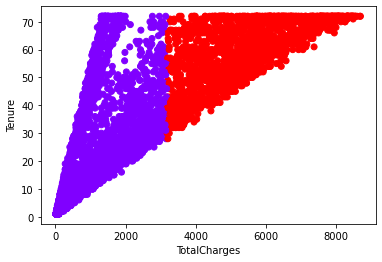

In [ ]:
plt.scatter(XX_train.iloc[:, XX_train.columns.get_loc("TotalCharges")], XX_train.iloc[:, XX_train.columns.get_loc("tenure")], c=y_kmeans5, cmap="rainbow")
plt.xlabel('TotalCharges')
plt.ylabel('Tenure')
plt.show()

<h2>Logestic Regression </h2>

<b> Now let's import neccessary library packages for using Logestic Regression</b>

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,  accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<b>Splitting the dataset into training and test data with the help of train_test_split function </b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_BE], y, test_size=0.3, random_state=0)

<b> Let's build/train our model now with the train dataset  </b>

In [ ]:
logit_model=sm.Logit(y_train,X_train).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.411337
         Iterations 10
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.291    
Dependent Variable:           Churn                      AIC:                        4087.2054
Date:                         2021-01-14 21:50           BIC:                        4210.7334
No. Observations:             4922                       Log-Likelihood:             -2024.6  
Df Model:                     18                         LL-Null:                    -2855.8  
Df Residuals:                 4903                       LLR p-value:                0.0000   
Converged:                    1.0000                     Scale:                      1.0000   
No. Iterations:               10.0000                                                         
----------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<b>Let's detrmine the predicted value using the trained model. And also calculate the Accuracy of our model </b>

In [ ]:
y_pred = logit_model.predict(X_test) 
prediction = list(map(round, y_pred)) 

<b> Confusion Matrix </b>

In [ ]:
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1392  163]
 [ 258  297]]


<b> accuracy score of the model</b>

In [ ]:
# accuracy score of the model 
print('Test accuracy = ', "{:.3f}".format(accuracy_score(y_test, prediction)) )

Test accuracy =  0.800


<b>A regression model that uses L2 is called Ridge Regression. </>

In [ ]:
model=LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lm=model.predict(X_test)

In [ ]:
# accuracy score of the model 
print('Test accuracy = ', "{:.3f}".format(accuracy_score(y_test, pred_lm)) )

Test accuracy =  0.800


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[1413  142]
 [ 275  280]]


<b> Classification Report </b>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



<b>With logestic regression we have got an accuracy of 80% from the model</b>

<b>Logestic + LASSO</b>

Glmnet is a package that fits a generalized linear model via penalized maximum likelihood. The regularization path is computed for the lasso or elasticnet penalty at a grid of values for the regularization parameter lambda. The algorithm is extremely fast, and can exploit sparsity in the input matrix x. 

 create weights

In [ ]:
t = scipy.ones((2461, 1), dtype = scipy.float64)
wts = scipy.row_stack((t, 2*t))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.row_stack is deprecated and will be removed in SciPy 2.0.0, use numpy.row_stack instead
  


glmnet provides various options for users to customize the fit. We introduce some commonly used options here and they can be specified in the glmnet function.<br>
--alpha is for the elastic-net mixing parameter α, with range α∈[0,1]. α=1 is the lasso (default) and α=0 is the ridge.<br>
--weights is for the observation weights. Default is 1 for each observation. (Note: glmnet rescales the weights to sum to N, the sample size.)<br>
--nlambda is the number of λ values in the sequence. Default is 100.

In [ ]:
fit = glmnet(x = X_train.to_numpy(), y = y_train.to_numpy(dtype=float),  weights = wts, alpha = 1, nlambda = 100,
             family = 'binomial')

In [ ]:
glmnetPrint(fit)

	 df 	 %dev 	 lambdau

0 	 0.000000 	 0.000000 	 0.178780
1 	 1.000000 	 0.024021 	 0.162898
2 	 1.000000 	 0.044214 	 0.148426
3 	 1.000000 	 0.061254 	 0.135240
4 	 2.000000 	 0.076566 	 0.123226
5 	 5.000000 	 0.095868 	 0.112279
6 	 6.000000 	 0.120008 	 0.102304
7 	 6.000000 	 0.140504 	 0.093216
8 	 6.000000 	 0.157964 	 0.084935
9 	 6.000000 	 0.172881 	 0.077390
10 	 6.000000 	 0.185651 	 0.070514
11 	 6.000000 	 0.196599 	 0.064250
12 	 6.000000 	 0.205987 	 0.058542
13 	 6.000000 	 0.214044 	 0.053342
14 	 7.000000 	 0.221405 	 0.048603
15 	 7.000000 	 0.228197 	 0.044285
16 	 8.000000 	 0.234085 	 0.040351
17 	 8.000000 	 0.239209 	 0.036766
18 	 8.000000 	 0.243591 	 0.033500
19 	 9.000000 	 0.247680 	 0.030524
20 	 9.000000 	 0.251236 	 0.027812
21 	 11.000000 	 0.254760 	 0.025342
22 	 11.000000 	 0.258235 	 0.023090
23 	 11.000000 	 0.261205 	 0.021039
24 	 11.000000 	 0.263736 	 0.019170
25 	 11.000000 	 0.265891 	 0.017467
26 	 13.000000 	 0.267873 	 0.015915
27 	 13.0

This displays the call that produced the object fit and a three-column matrix with columns Df (the number of nonzero coefficients), %dev (the percent deviance explained) and Lambda (the corresponding value of λ).

Users can also label the curves with variable sequence numbers simply by setting label = TRUE. Let’s plot “fit” against the log-lambda value and with each curve labeled.

/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:149: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  result = scipy.absolute(beta) > 0
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:153: DeprecationWarning: scipy.any is deprecated and will be removed in SciPy 2.0.0, use numpy.any instead
  result = scipy.any(result, axis = 1)
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:177: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  index = scipy.log(lambdau)
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:192: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  beta = scipy.transpose(beta)
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:202: DeprecationWarning: scipy.ones is deprecated and will be remove

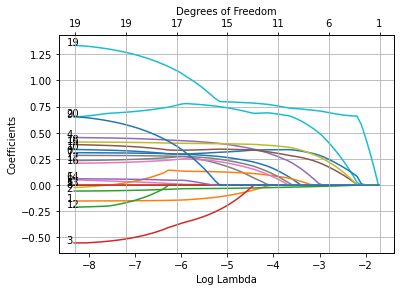

In [ ]:
glmnetPlot(fit, xvar = 'lambda', label = True);

Now when we plot against %deviance we get a very different picture. This is percent deviance explained on the training data. What we see here is that toward the end of the path this value are not changing much, but the coefficients are “blowing up” a bit. This lets us focus attention on the parts of the fit that matter.

/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:149: DeprecationWarning: scipy.absolute is deprecated and will be removed in SciPy 2.0.0, use numpy.absolute instead
  result = scipy.absolute(beta) > 0
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:153: DeprecationWarning: scipy.any is deprecated and will be removed in SciPy 2.0.0, use numpy.any instead
  result = scipy.any(result, axis = 1)
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:192: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  beta = scipy.transpose(beta)
/usr/local/lib/python3.6/dist-packages/glmnet_python/glmnetPlot.py:202: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  indat = scipy.ones(atdf.shape, dtype = scipy.integer)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:192: DeprecationWarning: Converting `np.integer` or `np.s

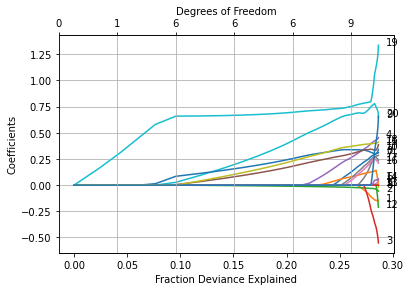

In [ ]:
glmnetPlot(fit, xvar = 'dev', label = True);

In [ ]:
warnings.filterwarnings('ignore')
cvfit = cvglmnet(x = X_train.to_numpy(), y = y_train.to_numpy(dtype=float), family='binomial', ptype="class")
warnings.filterwarnings('default')

The graph below depicts the mean square error against with the lambda coefficients`

/usr/local/lib/python3.6/dist-packages/glmnet_python/cvglmnetPlot.py:73: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sloglam = sign_lambda*scipy.log(cvobject['lambdau'])
/usr/local/lib/python3.6/dist-packages/glmnet_python/cvglmnetPlot.py:90: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  xval = sign_lambda*scipy.log(scipy.array([cvobject['lambda_min'], cvobject['lambda_min']]))
/usr/local/lib/python3.6/dist-packages/glmnet_python/cvglmnetPlot.py:90: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  xval = sign_lambda*scipy.log(scipy.array([cvobject['lambda_min'], cvobject['lambda_min']]))
/usr/local/lib/python3.6/dist-packages/glmnet_python/cvglmnetPlot.py:95: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  xval = sign_lam

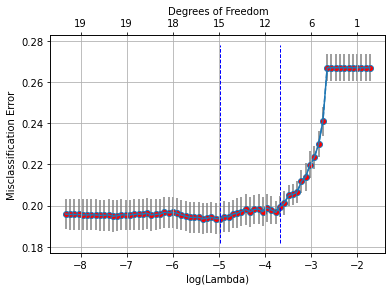

In [ ]:
cvglmnetPlot(cvfit)

In [ ]:
pred=glmnetPredict(fit, newx = X_test, ptype='class', s = scipy.array([0.01]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.


In [ ]:
# accuracy score of the model 
print('Test accuracy = ', "{:.3f}".format(accuracy_score(y_test, pred)) )

Test accuracy =  0.802


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[1413  142]
 [ 275  280]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.66      0.50      0.57       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



<b> With Logestic with Lasso we have achieved the same accuracy as we got before with only logestic regression i.e 80%.</b>

<b>Random Forest</b>

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf=35, max_features=3, random_state = 42)
# Train the model on training data
classifier=rf.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# Use the forest's predict method on the test data
pred_RF = rf.predict(X_test)

<b>confusion_matrix</b>

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_RF)
print(confusion_matrix)

[[1425  130]
 [ 315  240]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1555
           1       0.65      0.43      0.52       555

    accuracy                           0.79      2110
   macro avg       0.73      0.67      0.69      2110
weighted avg       0.77      0.79      0.77      2110



<b>accuracy score of the model</b>

In [ ]:
# accuracy score of the model 
print('Test accuracy = ', "{:.3f}".format(accuracy_score(y_test, prediction)) )

Test accuracy =  0.789


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
#importances=importances.sort()

In [ ]:
importances=sorted(importances)

In [ ]:
# Saving feature names for later use
feature_list = list(X_train.columns)

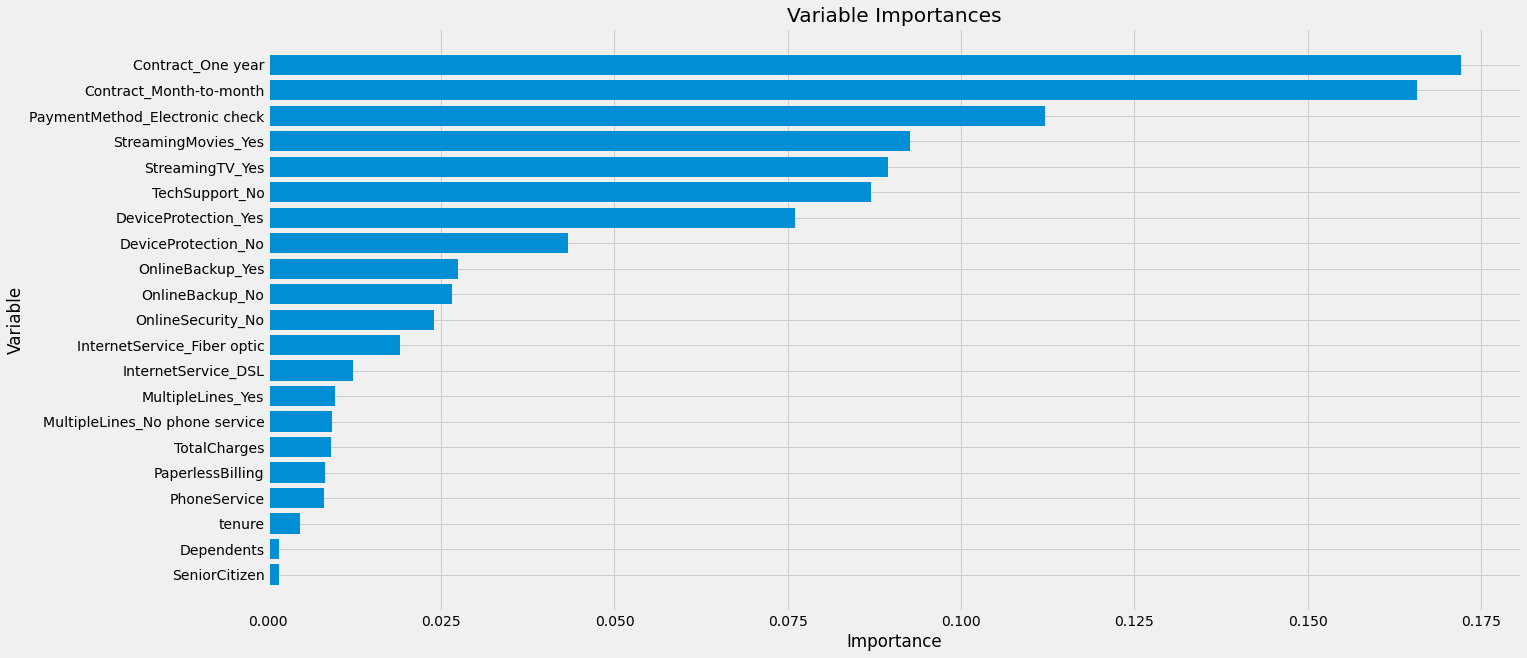

In [ ]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.barh(x_values, importances)
# Tick labels for x axis
plt.yticks(x_values, feature_list, rotation='horizontal')
# Axis labels and title
plt.ylabel('Variable'); plt.xlabel('Importance'); plt.title('Variable Importances');

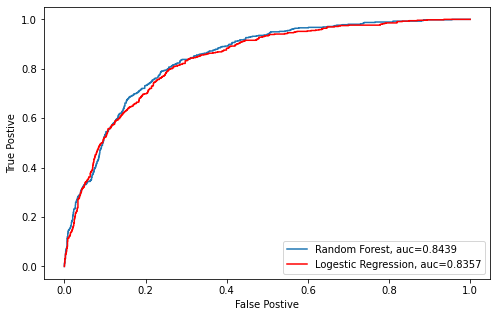

In [ ]:
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
plt.figure(figsize=(8,5))
fpr_rf, tpr_rf, _rf = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(auc.round(4)))

y_pred_proba_lm_lasso= model.predict_proba(X_test)[::,1]
fpr_lm_lasso, tpr_lm_lasso, _lm_lasso = metrics.roc_curve(y_test,  y_pred_proba_lm)
auc_lm_lasso = metrics.roc_auc_score(y_test, y_pred_proba_lm_lasso)
plt.plot(fpr_lm_lasso,tpr_lm_lasso,label="Logestic Regression, auc="+str(auc_lm_lasso.round(4)), color='red')
plt.legend(loc=4)
plt.ylabel('True Postive'); plt.xlabel('False Postive');
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.580 auc=0.629
Random Forest: f1=0.580 auc=0.644


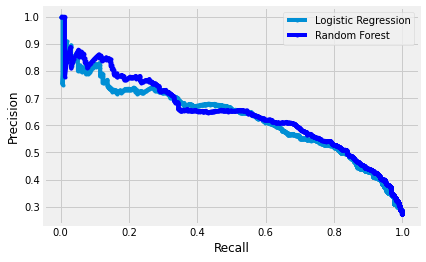

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba_lm_lasso)
lr_f1, lr_auc = f1_score(y_test, pred_lm), auc(lr_recall, lr_precision)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_proba_rf)
rf_f1, rf_auc = f1_score(y_test, pred_lm), auc(rf_recall, rf_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest', color='blue')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

<h2>Implications</h2>

<b>Offer Monthly Discount of 2.2% to Break Even, 
Do Nothing to Maximize Net Profit of $696,696</b>

With this implication we have got $492,547.13 new profit

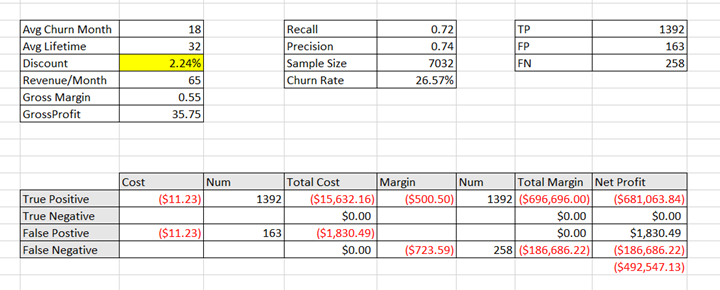

<b>Offer Monthly Discount of 5.52% to Break Even, Do Nothing to Maximize Net Profit of $713,213</b>

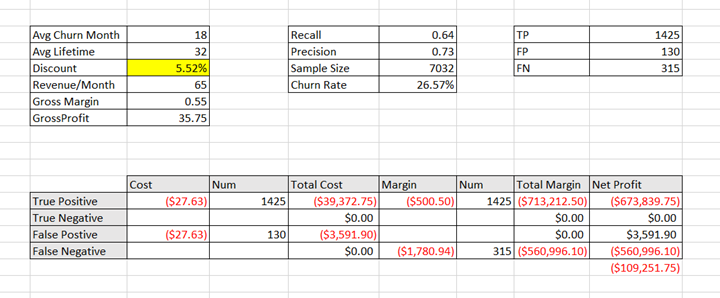

With this implication we have got $109,251.75 new profit

<h2><b>Limitations</b></h2>

<li>Limited Data (7,032 observations with 21 variables)
<li> Imbalanced Data (26.54% of churned customers)
<li> Bias: a point in time
<li> More features and more data to train model
<li>Not possible to retain high precision when aiming high recall


<h2><b>Conclusions</b></h2>


# Careful revision before implementing any actions on churned customers